In [42]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

,y
week,
2022-11-28,4444
2022-12-05,4920
2022-12-12,5342
2022-12-19,3868
2022-12-26,3607


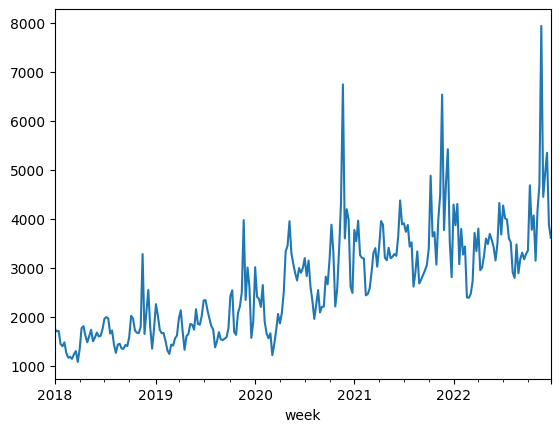

In [43]:
df = pd.read_csv('weekly_customer_complaints.csv')
df = df[['week', 'complaints']]
df['week'] = pd.to_datetime(df['week'])
df['complaints'] = df['complaints'].str.replace(',', '').astype(int)
df = df.rename(columns={'complaints': 'y'})
df = df.set_index('week')

#df = df.loc[df.index.year.isin([2022,2021])]
df['y'].plot()
df.tail()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2018-01-01 to 2022-12-26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       261 non-null    int64
dtypes: int64(1)
memory usage: 4.1 KB


In [45]:
hw = ExponentialSmoothing(df['y'], trend='add', seasonal='mul', seasonal_periods=52).fit()

C:\Users\KE541ZM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


In [46]:
hwf = hw.forecast(20)
hwf[-5:]

2023-04-17    4005.263334
2023-04-24    4023.088276
2023-05-01    4244.380059
2023-05-08    4553.181538
2023-05-15    4318.671427
Freq: W-MON, dtype: float64

(array([18993., 19052., 19113., 19174., 19236., 19297., 19358., 19417.,
        19478.]),
 [Text(18993.0, 0, '2022-01'),
  Text(19052.0, 0, '2022-03'),
  Text(19113.0, 0, '2022-05'),
  Text(19174.0, 0, '2022-07'),
  Text(19236.0, 0, '2022-09'),
  Text(19297.0, 0, '2022-11'),
  Text(19358.0, 0, '2023-01'),
  Text(19417.0, 0, '2023-03'),
  Text(19478.0, 0, '2023-05')])

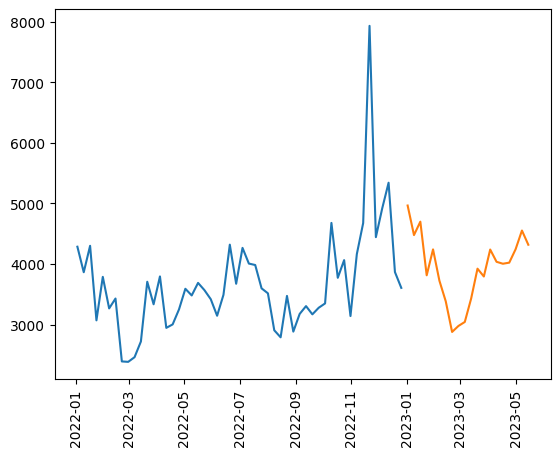

In [50]:
plt.plot(df.loc['2022'], label='base data')
plt.plot(hwf, label='forecast')
plt.xticks(rotation = 90)

C:\Users\KE541ZM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


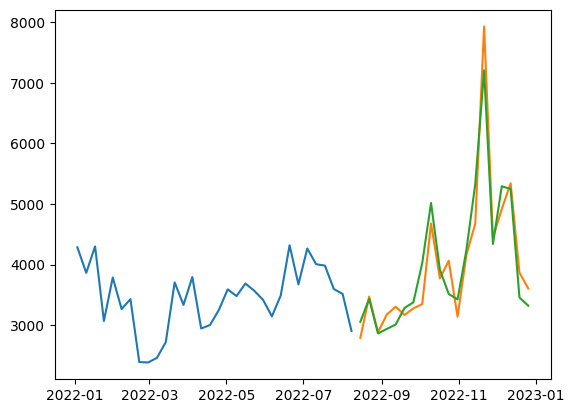

In [59]:
train, test = df.iloc[:-20, 0], df.iloc[-20:, 0]

exps = ExponentialSmoothing(train, trend='add', seasonal='mul', seasonal_periods=52).fit()
ex = exps.forecast(20)

plt.plot(train.loc['2022'], label='Train data')
plt.plot(test, label = 'Test data')
plt.plot(ex, label='Forecast data')


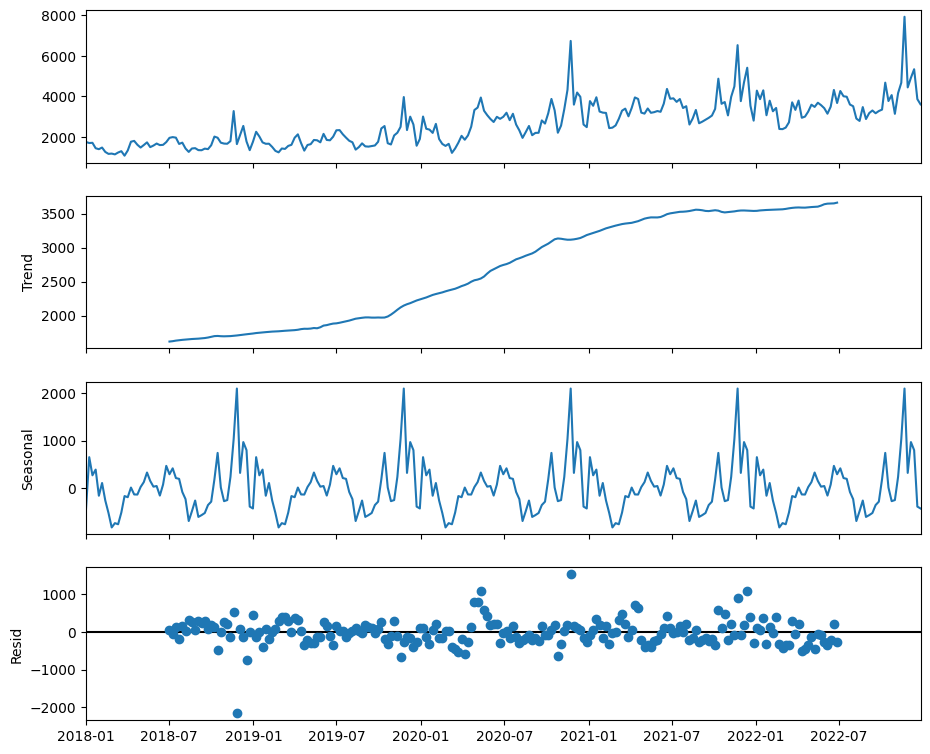

In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose

dd = seasonal_decompose(df, model='additive', period=52)

dff = dd.plot()
dff.set_size_inches(10,8)




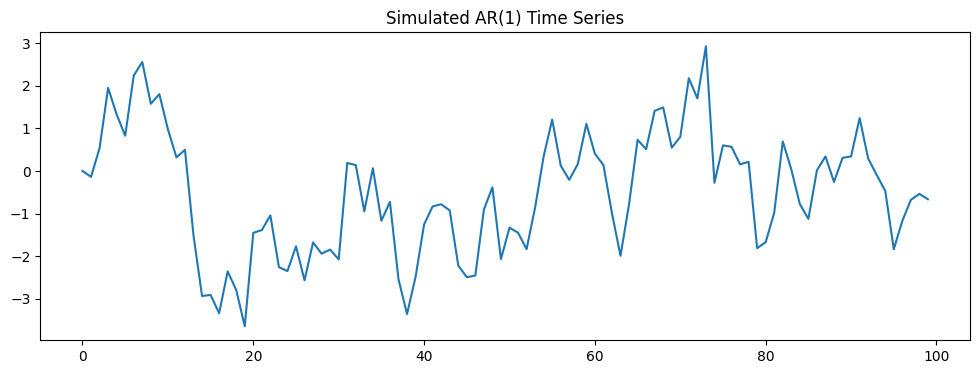

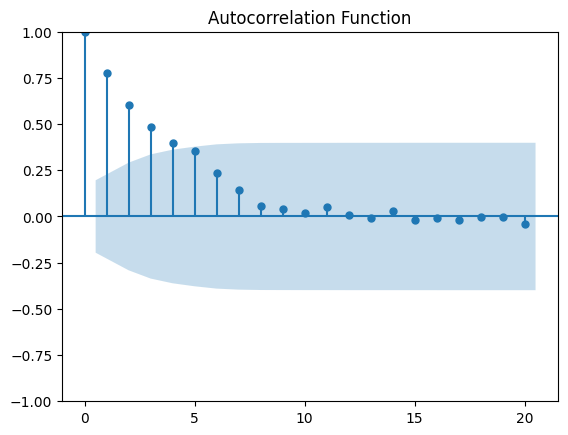

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Set random seed for reproducibility
np.random.seed(42)

# Generate AR(1) process: x_t = 0.8 * x_{t-1} + noise
n = 100
noise = np.random.normal(0, 1, n)
x = np.zeros(n)
for t in range(1, n):
    x[t] = 0.8 * x[t-1] + noise[t]

ts = pd.Series(x)

# Plot the time series
plt.figure(figsize=(12, 4))
plt.plot(ts)
plt.title('Simulated AR(1) Time Series')
plt.show()

# Plot autocorrelation function (ACF)
plot_acf(ts, lags=20)
plt.title('Autocorrelation Function')
plt.show()


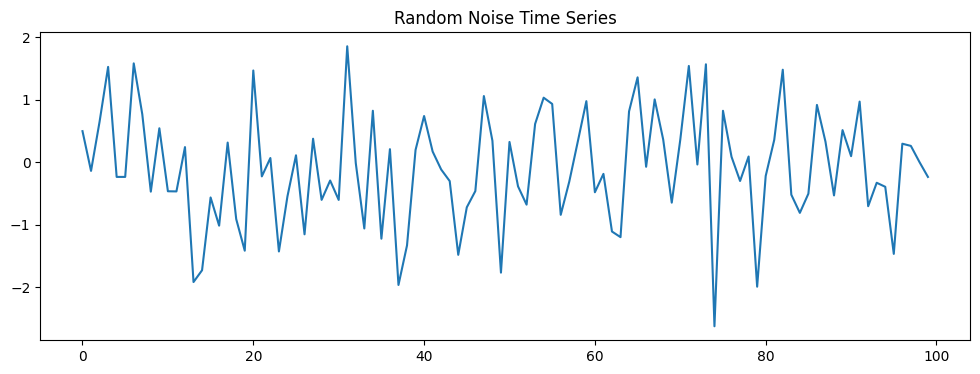

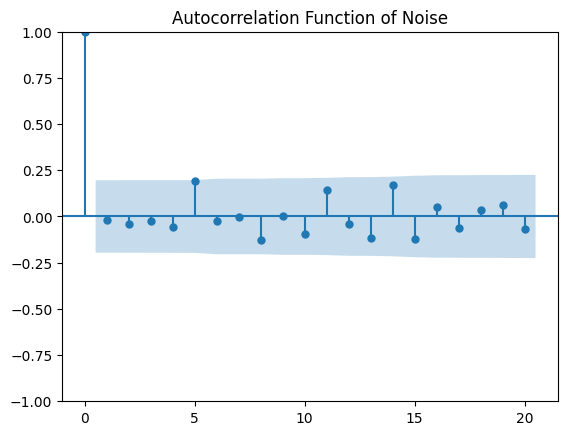

In [79]:
np.random.seed(42)
noise = np.random.normal(0, 1, 100)
ts_noise = pd.Series(noise)

plt.figure(figsize=(12, 4))
plt.plot(ts_noise)
plt.title('Random Noise Time Series')
plt.show()

plot_acf(ts_noise, lags=20)
plt.title('Autocorrelation Function of Noise')
plt.show()


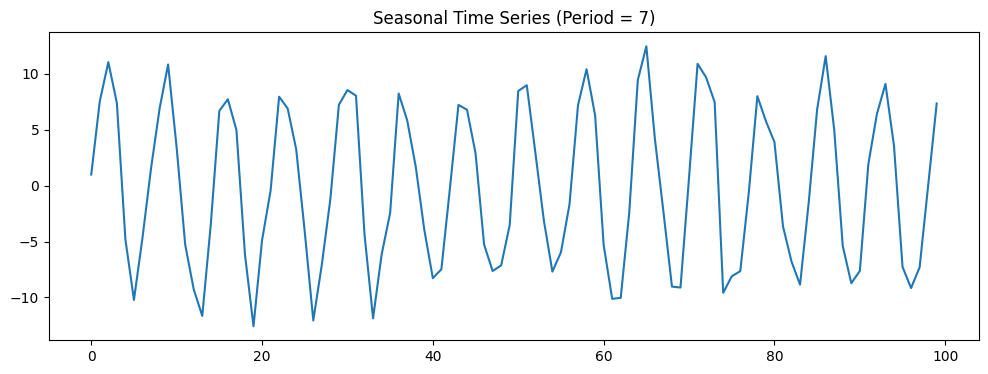

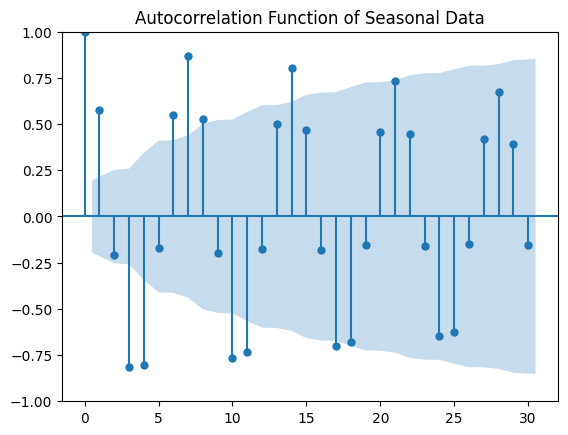

In [80]:
np.random.seed(42)
period = 7
t = np.arange(100)
seasonal = 10 * np.sin(2 * np.pi * t / period)
noise = np.random.normal(0, 2, 100)
ts_seasonal = pd.Series(seasonal + noise)

plt.figure(figsize=(12, 4))
plt.plot(ts_seasonal)
plt.title('Seasonal Time Series (Period = 7)')
plt.show()

plot_acf(ts_seasonal, lags=30)
plt.title('Autocorrelation Function of Seasonal Data')
plt.show()
